In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns



In [115]:
df=pd.read_csv("titanic_data.csv")

In [116]:
df.shape

(891, 12)

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
df['Fare'].dtype

dtype('float64')

In [120]:
df_catgorical=[feature for feature in df.columns if df[feature].dtype=='O' ]

In [121]:
print("Columns contains categorical values:",df_catgorical)


Columns contains categorical values: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [122]:
df_numerical=[feature for feature in df.columns if df[feature].dtype!='O' ]

In [123]:
print("Columns contains numerical values:",df_numerical)

Columns contains numerical values: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [124]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
df.shape

(891, 12)

In [126]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

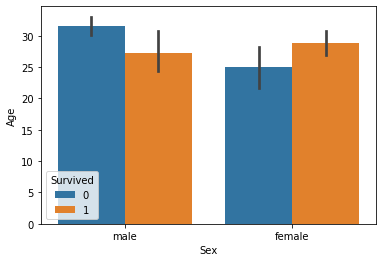

In [127]:
sns.barplot(x="Sex",y='Age',hue="Survived",data=df)

In [128]:
df.shape

(891, 12)

In [129]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
newdf=df.drop("Cabin",axis=1)

In [131]:
newdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [132]:
newdf["Age"]=newdf["Age"].fillna(newdf["Age"].median())

In [133]:
newdf["Embarked"]=newdf["Embarked"].fillna("ffill")

In [134]:
newdf.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [135]:
cor=newdf.corr()

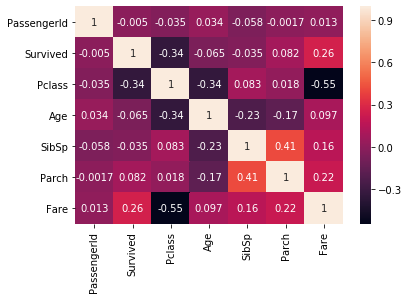

In [136]:
sns.heatmap(cor,annot=True)

In [137]:
newdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [138]:
remove=["PassengerId","Age","SibSp","Parch","Name","Ticket","Embarked"]

In [139]:
newdf=newdf.drop(remove,axis=1)

In [140]:
newdf.head()

,Survived,Pclass,Sex,Fare
0,0,3,male,7.2500
1,1,1,female,71.2833
2,1,3,female,7.9250
3,1,1,female,53.1000
4,0,3,male,8.0500


In [148]:
ndf=pd.get_dummies(newdf["Sex"],drop_first=True)


In [154]:
newdf=newdf.drop("Sex",axis=1)

In [155]:
ndf.head()

,male
0,1
1,0
2,0
3,0
4,1


In [164]:
nedf=pd.concat([newdf,ndf],axis=1)

In [165]:
nedf.head()

,Survived,Pclass,Fare,male
0,0,3,7.2500,1
1,1,1,71.2833,0
2,1,3,7.9250,0
3,1,1,53.1000,0
4,0,3,8.0500,1


In [166]:
x=nedf.iloc[:,1:4]

In [167]:
x.head()

,Pclass,Fare,male
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1


In [168]:
y=nedf.iloc[:,0:1]

In [169]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [178]:
x_train.shape,x_test.shape

((623, 3), (268, 3))

In [179]:
y_train.shape,y_test.shape

((623, 1), (268, 1))

In [180]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

C:\Users\shriram zauwar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [181]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8134328358208955
